In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

In [3]:
df = pd.read_csv('placemen.csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

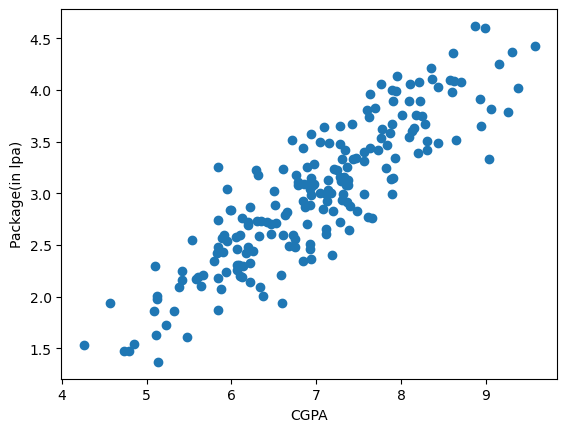

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [7]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [8]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [9]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [17]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

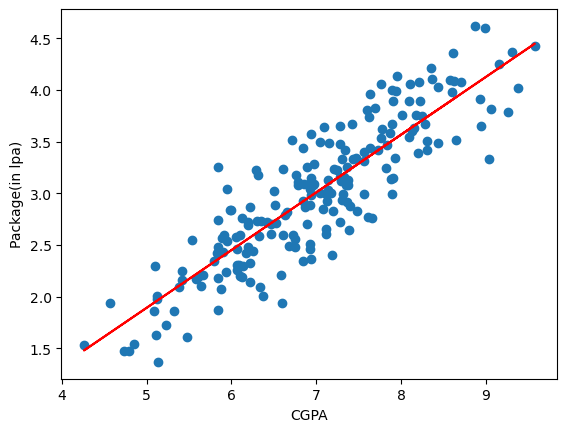

In [18]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [22]:
y_pred = lr.predict(X_test)

In [21]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [23]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [24]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [25]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE 0.34827051717731616


In [27]:
print('R2 Score',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 0.780730147510384


In [ ]:
print('MSE',mean_squared_error(y_test,y_pred))

In [28]:
# Adjusted R2 Score
X_test.shape

(40, 1)

In [29]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [30]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.004723,3.26
1,5.12,0.461224,1.98
2,7.82,0.358307,3.25
3,7.42,0.761327,3.67
4,6.94,0.312856,3.57


Text(0, 0.5, 'Package(in lpa)')

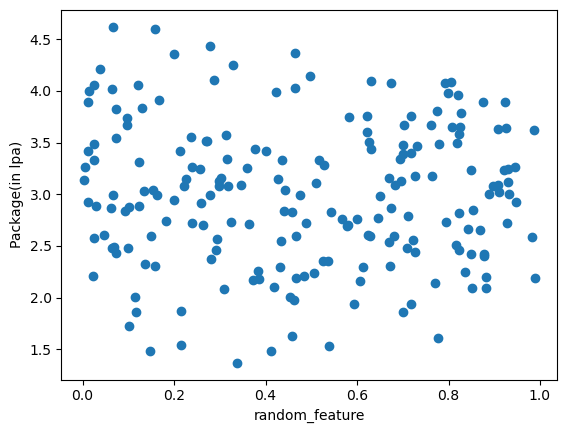

In [31]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [32]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred = lr.predict(X_test)

In [37]:
print('R2 Score',r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 0.779570760840571


In [38]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7676556668319532

In [39]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [40]:
new_df2.sample(5)


,cgpa,iq,package
91,6.22,3.04,2.14
173,6.75,2.66,2.56
48,8.63,4.89,4.09
61,5.48,2.61,1.61
43,7.66,1.96,2.76


Text(0, 0.5, 'Package(in lpa)')

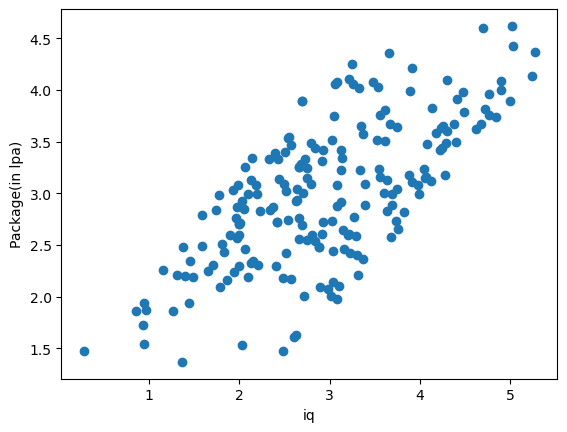

In [41]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [42]:
np.random.randint(-100,100)


-67

In [43]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [45]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [46]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8243901622976417


In [47]:
1 - ((1-r2)*(40-1)/(40-1-2))


0.8148977386380548